# 1. Implement K-nearest neighbor classifier and provide the accuracy# 

In [1]:
import tensorflow as tf
import numpy as np

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [2]:
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Printing shape of X and y

print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (50000, 32, 32, 3)
Shape of y_train (50000, 1)
Shape of X_test (10000, 32, 32, 3)
Shape of y_test (10000, 1)


In [3]:
# Convert labels to 1-D array
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reshape the images to 1D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
knn.fit(X_train,y_train)

# Predict the labels for the test set
predicted_labels = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy*100)


Accuracy: 33.86


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Generate classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.51      0.46      1000
           1       0.77      0.18      0.30      1000
           2       0.22      0.44      0.29      1000
           3       0.30      0.19      0.23      1000
           4       0.23      0.54      0.32      1000
           5       0.43      0.22      0.29      1000
           6       0.33      0.26      0.29      1000
           7       0.72      0.20      0.31      1000
           8       0.38      0.70      0.49      1000
           9       0.79      0.15      0.25      1000

    accuracy                           0.34     10000
   macro avg       0.46      0.34      0.32     10000
weighted avg       0.46      0.34      0.32     10000

Confusion Matrix:
[[510   3 109  16  57   4  26   6 269   0]
 [109 183 135  35 183  25  69   6 237  18]
 [100   1 438  38 267  33  54   7  60   2]
 [ 55   3 230 189 231 101 126  10  51   4]
 [ 58   0 265  20 539  13  4

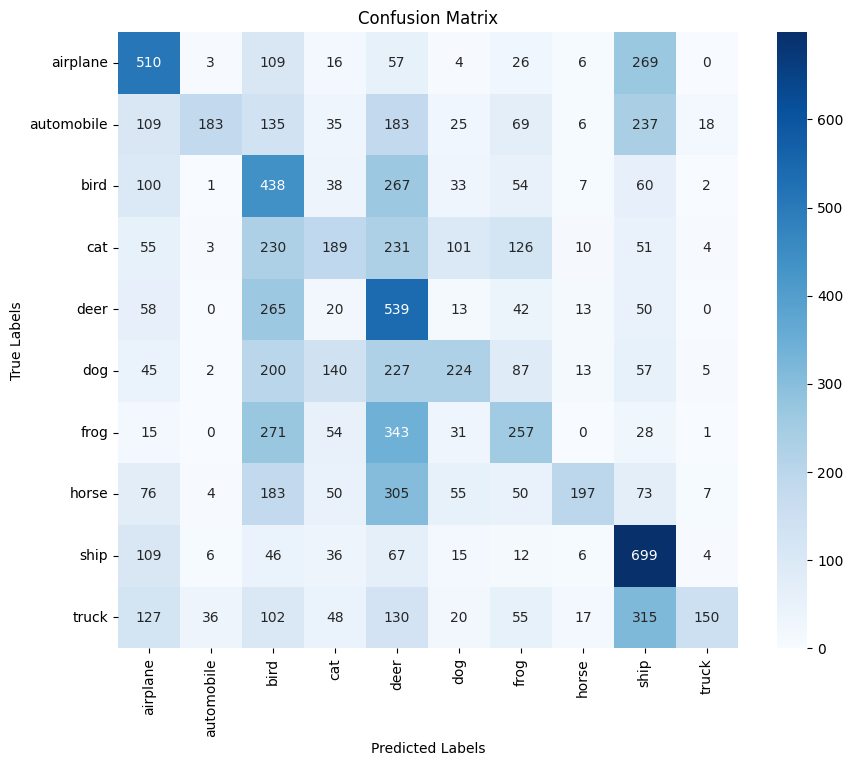

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix as heatmap with labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Performance of KNN is very poor on the CIAFR 10 dataset and the accuracy is very less which is equals to 33 percent

# 2. Implement any DL-based image classification algorithm except AlexNet and provide the accuracy

VGG16-Model on CIFAR10 DATASET

In [8]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score



In [9]:
# Using VGG16 model, with weights pre-trained on ImageNet.
#------------------------------------------------------------------------------

vgg16_model = VGG16(weights='imagenet',
                    include_top=False,
                    classes=10,
                    input_shape=(32,32,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

58889256/58889256 [==============================] - 1s 0us/step


In [10]:
#Define the sequential model and add th VGG's layers to it
vgg16_model1 = Sequential()
for layer in vgg16_model.layers:
    vgg16_model1.add(layer)

In [11]:
#------------------------------------------------------------------------------
# Adding hiddens  and output layer to our model
#------------------------------------------------------------------------------

from tensorflow.keras.layers import Dense, Flatten, Dropout
vgg16_model1.add(Flatten())
vgg16_model1.add(Dense(512, activation='relu', name='hidden1'))
vgg16_model1.add(Dropout(0.4))
vgg16_model1.add(Dense(256, activation='relu', name='hidden2'))
vgg16_model1.add(Dropout(0.4))
vgg16_model1.add(Dense(10, activation='softmax', name='predictions'))

vgg16_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [12]:
#------------------------------------------------------------------------------
#  Loading CIFAR10 data
#------------------------------------------------------------------------------

(X_train, y_train), (X_test, y_test) = k.datasets.cifar10.load_data()

print("******************")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

******************
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [13]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [14]:
# Data normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  /= 255
X_test /= 255

print("******************")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

******************
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [15]:
X_val = X_train[40000:]
y_val = y_train[40000:]
print(X_val.shape)
print(y_val.shape)

(10000, 32, 32, 3)
(10000, 10)


In [16]:
# Splitting data for validation

X_train = X_train[:40000]
y_train = y_train[:40000]
print(X_train.shape)
print(y_train.shape)

(40000, 32, 32, 3)
(40000, 10)


In [17]:

# initiate SGD optimizer
sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9)

# For a multi-class classification problem
vgg16_model1.compile(loss='categorical_crossentropy',optimizer= sgd,metrics=['accuracy'])


def lr_scheduler(epoch):
    return 0.001 * (0.5 ** (epoch // 20))
reduce_lr = LearningRateScheduler(lr_scheduler)

mc = ModelCheckpoint('./weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [18]:
import time
# initialize the number of epochs and batch size
EPOCHS = 50
BS = 128

# Construct the training image generator for data augmentation

aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

st_time = time.time()
# train the model
history = vgg16_model1.fit(
    aug.flow(X_train,y_train, batch_size=BS),
    validation_data=(X_val,y_val),
    steps_per_epoch=len(X_train) // BS,
    epochs=EPOCHS,
    callbacks=[reduce_lr,mc])

end_time = time.time()

training_time = end_time - st_time


#We load the best weights saved by the ModelCheckpoint
vgg16_model1.load_weights('./weights.h5')


Epoch 1/50
312/312 [==============================] - ETA: 0s - loss: 1.8206 - accuracy: 0.3382

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


312/312 [==============================] - 44s 114ms/step - loss: 1.8206 - accuracy: 0.3382 - val_loss: 1.1542 - val_accuracy: 0.5973 - lr: 0.0010
Epoch 2/50
312/312 [==============================] - 32s 103ms/step - loss: 1.2254 - accuracy: 0.5764 - val_loss: 0.9403 - val_accuracy: 0.6717 - lr: 0.0010
Epoch 3/50
312/312 [==============================] - 34s 109ms/step - loss: 1.0143 - accuracy: 0.6568 - val_loss: 0.7825 - val_accuracy: 0.7356 - lr: 0.0010
Epoch 4/50
312/312 [==============================] - 35s 112ms/step - loss: 0.9090 - accuracy: 0.6947 - val_loss: 0.7188 - val_accuracy: 0.7473 - lr: 0.0010
Epoch 5/50
312/312 [==============================] - 32s 102ms/step - loss: 0.8395 - accuracy: 0.7185 - val_loss: 0.6643 - val_accuracy: 0.7765 - lr: 0.0010
Epoch 6/50
312/312 [==============================] - 33s 104ms/step - loss: 0.7893 - accuracy: 0.7392 - val_loss: 0.6371 - val_accuracy: 0.7815 - lr: 0.0010
Epoch 7/50
312/312 [==============================] - 32s 103ms

In [19]:
print('Training time of VGG16Model on CIFAR 10 Dataset is',training_time)

Training time of VGG16Model on CIFAR 10 Dataset is 1696.7043633460999


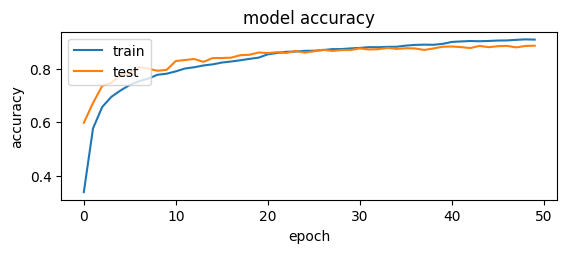

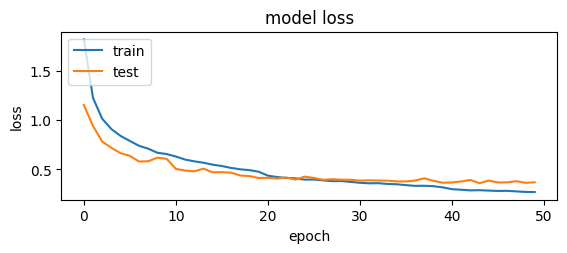

In [20]:
import matplotlib.pyplot as plt

# Visualize Model Training History (Baseline Model)

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss (Baseline Model)

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
val_loss, val_accuracy = vgg16_model1.evaluate(X_val, y_val)
print('Validation loss: {}\nValidation accuracy: {}'.format(val_loss, val_accuracy))

313/313 [==============================] - 3s 8ms/step - loss: 0.3690 - accuracy: 0.8858
Validation loss: 0.3689676821231842
Validation accuracy: 0.8858000040054321


In [22]:
test_loss, test_accuracy = vgg16_model1.evaluate(X_test,y_test,)
print('Testing loss: {}\nTesting accuracy: {}'.format(test_loss, test_accuracy))

313/313 [==============================] - 3s 9ms/step - loss: 0.3927 - accuracy: 0.8784
Testing loss: 0.39265990257263184
Testing accuracy: 0.8784000277519226


In [ ]:
pred = vgg16_model1.evaluate()

313/313 [==============================] - 3s 10ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.91      0.90      0.91      1000
  automobile       0.92      0.96      0.94      1000
        bird       0.89      0.83      0.86      1000
         cat       0.81      0.68      0.74      1000
        deer       0.87      0.85      0.86      1000
         dog       0.82      0.80      0.81      1000
        frog       0.86      0.94      0.90      1000
       horse       0.86      0.94      0.90      1000
        ship       0.95      0.93      0.94      1000
       truck       0.90      0.94      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



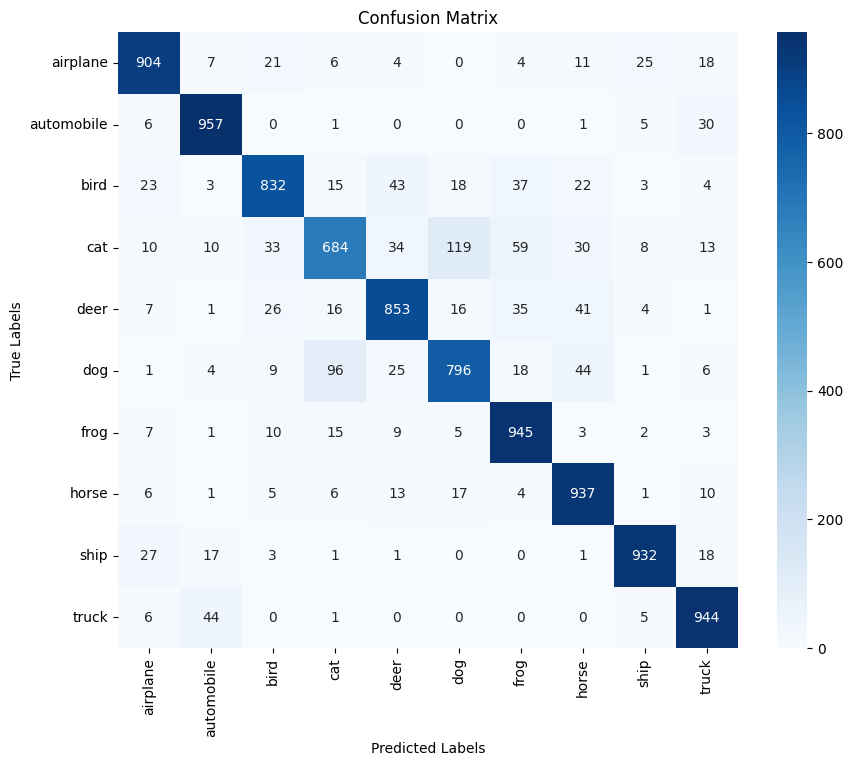

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
predicted_labels = vgg16_model1.predict(X_test)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predicted_labels, axis=1)

# Convert true labels to class names
true_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Generate classification report
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Plot confusion matrix as heatmap with labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


ResNet50 on CIFAR10 Dataset

In [25]:
# Loading dataset

(training_images, training_labels) , (validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()

In [26]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_ims

In [27]:
train_X = preprocess_image_input(training_images)
valid_X = preprocess_image_input(validation_images)

In [29]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights.
Input size is 224 x 224.
'''
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                             weights='imagenet')(inputs)
  return feature_extractor

In [30]:
'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x


In [31]:
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

In [32]:
'''
Define the model and compile it.
Use Stochastic Gradient Descent as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))

  classification_output = final_model(inputs)
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)

  model.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])

  return model


model = define_compile_model()

In [33]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2  (None, 224, 224, 3)       0         
 D)                                                              
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              209817

In [34]:
EPOCHS = 3

s_time = time.time()

history1 = model.fit(train_X, training_labels, epochs=EPOCHS, validation_data = (valid_X, validation_labels), batch_size=64)

ed_time =time.time()


Epoch 1/3
782/782 [==============================] - 585s 701ms/step - loss: 0.4038 - accuracy: 0.8679 - val_loss: 0.2191 - val_accuracy: 0.9227
Epoch 2/3
782/782 [==============================] - 567s 726ms/step - loss: 0.1014 - accuracy: 0.9678 - val_loss: 0.1629 - val_accuracy: 0.9457
Epoch 3/3
782/782 [==============================] - 569s 727ms/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.1703 - val_accuracy: 0.9494


In [35]:
train_time = ed_time - st_time
print("Training time of ResNet50 model on CIFAR10 Dataset is",train_time)

Training time of ResNet50 model on CIFAR10 Dataset is 5148.440293073654


In [38]:
loss, accuracy = model.evaluate(valid_X, validation_labels, batch_size=64)


157/157 [==============================] - 26s 167ms/step - loss: 0.1703 - accuracy: 0.9494


# 3. Implement any DL-based object detection (R-CNN, YOLO etc.) pipeline. You do not need to train the network. Run the inference using pretrained object detection models. Provide the object detection results for 5 different classes/objects.

In [1]:
import cv2

# Load the configuration and weights
cfg_file = "yolov3.cfg"
weights_file = "yolov3.weights"
net = cv2.dnn.readNetFromDarknet(cfg_file, weights_file)

# Get the names of the output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]



ModuleNotFoundError: No module named 'cv2'

In [2]:
def read_coco_names(file_path):
    with open(file_path, 'r') as file:
        names = file.read().splitlines()
    return names

# Path to coco.names file
coco_names_file = "coco.names"

# Read labels from coco.names file
classes = read_coco_names(coco_names_file)

# Print the labels
print("Labels:", classes)


Labels: ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [17]:
import cv2
import numpy as np


# Load image
image = cv2.imread("image3.jpg")

# Resize the image to a smaller size
scale_percent = 35 # Adjust this value based on your preference as it depends on the input image resolution
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

# Preprocess image
blob = cv2.dnn.blobFromImage(image, 0.005, (316,316), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [ ]:
# Define colors for different classes
class_colors = {
    'person': (255, 0, 0),
    'bicycle': (0, 0, 255),
    'car': (0, 255,0),
    'motorbike': (255, 255, 0),
    'aeroplane': (255, 0, 255),
    'bus': (0, 255, 255),
    'train': (128, 0, 0),
    'truck': (0, 128, 0),
    'boat': (0, 0, 128),
    'traffic light': (128, 128, 0),
    'fire hydrant': (0, 128, 128),
    'stop sign': (128, 0, 128),
    'parking meter': (255, 128, 0),
    'bench': (0, 255, 128),
    'bird': (128, 255, 0),
    'cat': (0, 128, 255),
    'dog': (255, 0, 128),
    'horse': (128, 0, 255),
    'sheep': (255, 128, 128),
    'cow': (128, 255, 128),
    'elephant': (128, 128, 255),
    'bear': (255, 255, 128),
    'zebra': (128, 255, 255),
    'giraffe': (255, 128, 255),
    'backpack': (255, 0, 64),
    'umbrella': (0, 255, 64),
    'handbag': (64, 0, 255),
    'tie': (255, 64, 0),
    'suitcase': (0, 255, 64),
    'frisbee': (64, 255, 0),
    'skis': (0, 64, 255),
    'snowboard': (255, 0, 64),
    'sports ball': (64, 255, 0),
    'kite': (0, 64, 255),
    'baseball bat': (255, 64, 0),
    'baseball glove': (64, 0, 255),
    'skateboard': (255, 255, 64),
    'surfboard': (64, 255, 255),
    'tennis racket': (255, 64, 255),
    'bottle': (255, 128, 64),
    'wine glass': (128, 255, 64),
    'cup': (64, 128, 255),
    'fork': (255, 64, 128),
    'knife': (128, 255, 64),
    'spoon': (64, 128, 255),
    'bowl': (255, 64, 128),
    'banana': (128, 255, 64),
    'apple': (64, 128, 255),
    'sandwich': (255, 64, 128),
    'orange': (128, 255, 64),
    'broccoli': (64, 128, 255),
    'carrot': (255, 64, 128),
    'hot dog': (128, 255, 64),
    'pizza': (64, 128, 255),
    'donut': (255, 64, 128),
    'cake': (128, 255, 64),
    'chair': (128, 128, 255),
    'sofa': (255, 64, 128),
    'pottedplant': (128, 255, 64),
    'bed': (64, 128, 255),
    'diningtable': (255, 64, 128),
    'toilet': (128, 255, 64),
    'tvmonitor': (0, 128, 255),
    'laptop': (255, 64, 128),
    'mouse': (128, 255, 64),
    'remote': (64, 128, 255),
    'keyboard': (255, 64, 128),
    'cell phone': (128, 255, 64),
    'microwave': (64, 128, 255),
    'oven': (255, 64, 128),
    'toaster': (128, 255, 64),
    'sink': (64, 128, 255),
    'refrigerator': (255, 64, 128),
    'book': (128, 255, 64),
    'clock': (64, 128, 255),
    'vase': (255, 64, 128),
    'scissors': (128, 255, 64),
    'teddy bear': (64, 128, 255),
    'hair drier': (255, 64, 128),
    'toothbrush': (128, 255, 64)
}



In [18]:
# Process detections
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            # Get color for current class
            color = class_colors.get(class_id,class_colors[classes[class_id]])
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, classes[class_id], (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Save the image
cv2.imwrite("detected_image1.jpg", image)

# Display the result
cv2.imshow("Object detection Window", image)
cv2.waitKey(0)
cv2.destroyAllWindows()



I have the yolov3 model for the object detetction and this model is trained the 80 lables which are in the above cell and here i just used the existing model and its weights to perform the detection task on the test images.I test this on multiple images and the detetction capability is fine.I have also saved the images after the detection is performed on it.Here,in the model i have just used the unconnection which are 3 in number for the detetction 

# 4. Implement vision transformer and compare the accuracy with results from Q2


In [41]:
 import tensorflow.keras.datasets.cifar10 as cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print ('check shapes: ', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# train_im, test_im = x_train/255.0 , x_test/255.0

train_lab_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='uint8')

test_lab_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='uint8')


check shapes:  (50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [42]:
from sklearn.model_selection import train_test_split
train_im, valid_im, train_lab, valid_lab = train_test_split(x_train, train_lab_categorical, test_size=0.20,
                                                            stratify=train_lab_categorical,
                                                            random_state=40, shuffle = True) # stratify is unncessary

print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

class_types = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] # from cifar-10 website

print ('train im and label types: ', type(train_im), type(train_lab))


training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices((x_test, test_lab_categorical))

print ('check types; ', type(training_data), type(validation_data))


train data shape after the split:  (40000, 32, 32, 3)
new validation data shape:  (10000, 32, 32, 3)
validation labels shape:  (10000, 10)
train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [43]:
autotune = tf.data.AUTOTUNE

train_data_batches = training_data.shuffle(buffer_size=40000).batch(128).prefetch(buffer_size=autotune)
valid_data_batches = validation_data.shuffle(buffer_size=10000).batch(32).prefetch(buffer_size=autotune)
test_data_batches = test_data.shuffle(buffer_size=10000).batch(32).prefetch(buffer_size=autotune)



from itertools import islice, count

train_iter_7im, train_iter_7label = next(islice(training_data, 7, None)) # access the 7th element from the iterator



train_iter_7im = tf.expand_dims(train_iter_7im, 0)
train_iter_7label = train_iter_7label.numpy()

print('check shapes: ', train_iter_7im.shape)

check shapes:  (1, 32, 32, 3)


In [47]:
from tensorflow.keras import layers

class generate_patch(layers.Layer):
    def __init__(self, patch_size):
        super(generate_patch, self).__init__()
        self.patch_size = patch_size
    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(images=images,
                                           sizes=[1, self.patch_size, self.patch_size, 1],
                                           strides=[1, self.patch_size, self.patch_size, 1], rates=[1, 1, 1, 1], padding="VALID")
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims]) #here shape is (batch_size, num_patches, patch_h*patch_w*c)
        return patches

patch per image and patches shape:  64 
 (1, 64, 48)


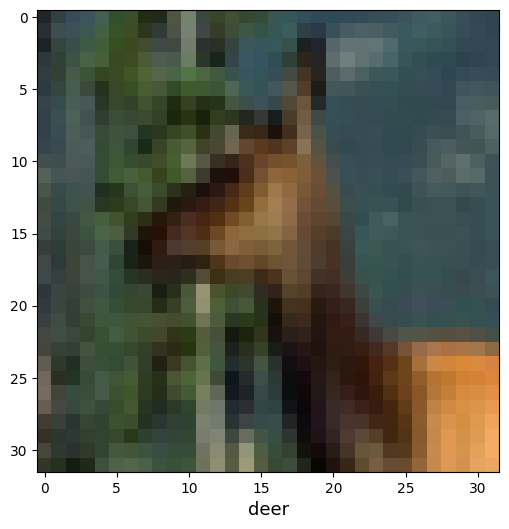

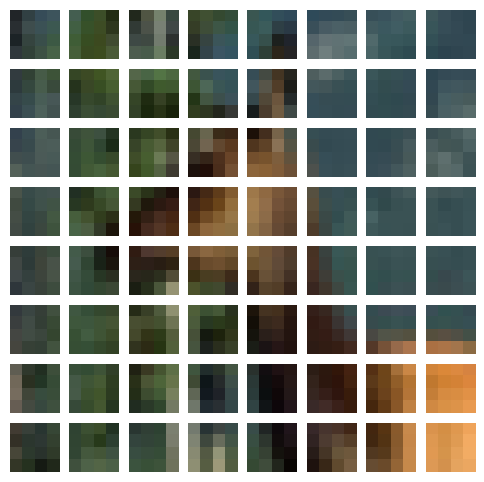

In [48]:
patch_size= 4
######################
# num patches (W * H) /P^2 where W, H are from original image, P is patch dim.
# Original image (H * W * C), patch N * P*P *C, N num patches
######################
generate_patch_layer = generate_patch(patch_size=patch_size)
patches = generate_patch_layer(train_iter_7im)

print ('patch per image and patches shape: ', patches.shape[1], '\n', patches.shape)


def render_image_and_patches(image, patches):
    plt.figure(figsize=(6, 6))
    plt.imshow(tf.cast(image[0], tf.uint8))
    plt.xlabel(class_types [np.argmax(train_iter_7label)], fontsize=13)
    n = int(np.sqrt(patches.shape[1]))
    plt.figure(figsize=(6, 6))
    #plt.suptitle(f"Image Patches", size=13)
    for i, patch in enumerate(patches[0]):
        ax = plt.subplot(n, n, i+1)
        patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
        ax.imshow(patch_img.numpy().astype("uint8"))
        ax.axis('off')




render_image_and_patches(train_iter_7im, patches)

In [49]:
### Positonal Encoding Layer

class PatchEncode_Embed(layers.Layer):
    '''
    2 steps happen here
    1. flatten the patches
    2. Map to dim D; patch embeddings
    '''
    def __init__(self, num_patches, projection_dim):
        super(PatchEncode_Embed, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)# activation = linear
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [50]:
patch_size=4
'''
This part takes images as inputs,
Conv layer filter matches query dim of multi-head attention layer
Add embeddings by randomly initializing the weights
'''


def generate_patch_conv_orgPaper_f(patch_size, hidden_size, inputs):
    patches = layers.Conv2D(filters=hidden_size, kernel_size=patch_size, strides=patch_size, padding='valid')(inputs)
    row_axis, col_axis = (1, 2) # channels last images
    seq_len = (inputs.shape[row_axis] // patch_size) * (inputs.shape[col_axis] // patch_size)
    x = tf.reshape(patches, [-1, seq_len, hidden_size])
    return x


In [51]:
### Positonal Encoding Layer

class AddPositionEmbs(layers.Layer):
    """inputs are image patches
    Custom layer to add positional embeddings to the inputs."""

    def __init__(self, posemb_init=None, **kwargs):
        super().__init__(**kwargs)
        self.posemb_init = posemb_init
        #posemb_init=tf.keras.initializers.RandomNormal(stddev=0.02), name='posembed_input') # used in original code

    def build(self, inputs_shape):
        pos_emb_shape = (1, inputs_shape[1], inputs_shape[2])
        self.pos_embedding = self.add_weight('pos_embedding', pos_emb_shape, initializer=self.posemb_init)
    def call(self, inputs, inputs_positions=None):
        # inputs.shape is (batch_size, seq_len, emb_dim).
        pos_embedding = tf.cast(self.pos_embedding, inputs.dtype)

        return inputs + pos_embedding

pos_embed_layer = AddPositionEmbs(posemb_init=tf.keras.initializers.RandomNormal(stddev=0.02))





In [52]:
hidden_size=64
train_iter_7im = tf.cast(train_iter_7im, dtype=tf.float16) # need to be done otherwise the format is `uint8'
patches_conv_org_f = generate_patch_conv_orgPaper_f(patch_size, hidden_size, train_iter_7im) # patch_size=4
print ('patch per image and patches shape: ', patches_conv_org_f.shape[1], '\n', patches_conv_org_f.shape)


embedded_inp = pos_embed_layer(patches_conv_org_f)

print ('embedded input shape: ', embedded_inp.shape)

patch per image and patches shape:  64 
 (1, 64, 64)
embedded input shape:  (1, 64, 64)


In [53]:

def mlp_block_f(mlp_dim, inputs):
    x = layers.Dense(units=mlp_dim, activation=tf.nn.gelu)(inputs)
    x = layers.Dropout(rate=0.1)(x) # dropout rate is from original paper,
    x = layers.Dense(units=inputs.shape[-1], activation=tf.nn.gelu)(x) # check GELU paper
    x = layers.Dropout(rate=0.1)(x)
    return x

def Encoder1Dblock_f(num_heads, mlp_dim, inputs):
    x = layers.LayerNormalization(dtype=inputs.dtype)(inputs)
    x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1], dropout=0.1)(x, x)
    # self attention multi-head, dropout_rate is from original implementation
    x = layers.Add()([x, inputs]) # 1st residual part

    y = layers.LayerNormalization(dtype=x.dtype)(x)
    y = mlp_block_f(mlp_dim, y)
    y_1 = layers.Add()([y, x]) #2nd residual part
    return y_1

def Encoder_f(num_layers, mlp_dim, num_heads, inputs):
    x = AddPositionEmbs(posemb_init=tf.keras.initializers.RandomNormal(stddev=0.02), name='posembed_input')(inputs)
    x = layers.Dropout(rate=0.2)(x)
    for _ in range(num_layers):
        x = Encoder1Dblock_f(num_heads, mlp_dim, x)
    encoded = layers.LayerNormalization(name='encoder_norm')(x)
    return encoded

In [54]:
### slight pre-processing and augmentation

rescale_layer = tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(1./255)])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.3),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3)),
  layers.experimental.preprocessing.RandomTranslation(0.2, 0.2, fill_mode='reflect', interpolation='bilinear',)
])


train_ds = (training_data.shuffle(40000).batch(128).map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=autotune).prefetch(autotune))
valid_ds = (validation_data.shuffle(10000).batch(32).prefetch(autotune))

In [55]:
transformer_layers = 6
patch_size = 4
hidden_size = 64
num_heads = 4
mlp_dim = 128

In [56]:
def build_ViT():
    inputs = layers.Input(shape=train_im.shape[1:])
    # rescaling (normalizing pixel val between 0 and 1)
    rescale = rescale_layer(inputs)
    # generate patches with conv layer
    patches = generate_patch_conv_orgPaper_f(patch_size, hidden_size, rescale)

    ######################################
    # ready for the transformer blocks
    ######################################
    encoder_out = Encoder_f(transformer_layers, mlp_dim, num_heads, patches)

    #####################################
    #  final part (mlp to classification)
    #####################################
    #encoder_out_rank = int(tf.experimental.numpy.ndim(encoder_out))
    im_representation = tf.reduce_mean(encoder_out, axis=1)  # (1,) or (1,2)

    logits = layers.Dense(units=len(class_types), name='head', kernel_initializer=tf.keras.initializers.zeros)(im_representation)
    # !!! important !!! activation is linear

    final_model = tf.keras.Model(inputs = inputs, outputs = logits)
    # we keep the logits but not softmax in accordance with the original implementation
    return final_model



ViT_model = build_ViT()
ViT_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 32, 32, 3)            0         ['input_4[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 8, 8, 64)             3136      ['sequential_1[0][0]']        
                                                                                                  
 tf.reshape (TFOpLambda)     (None, 64, 64)               0         ['conv2d_1[0][0]']            
                                                                                            

In [57]:
### model

ViT_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
                  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy"), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5 acc')])
#tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy")],)
# from logits = True, because Dense layer has linear activation


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7,
                              patience=5, min_lr=1e-5, verbose=1)

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-6, patience=10, restore_best_weights=True)

In [58]:
ViT_Train = ViT_model.fit(train_ds,
                          epochs = 100,
                          validation_data=valid_ds, callbacks=[reduce_lr, es])

Epoch 1/100
313/313 [==============================] - 48s 88ms/step - loss: 2.2877 - accuracy: 0.1158 - top5 acc: 0.5386 - val_loss: 2.3020 - val_accuracy: 0.1000 - val_top5 acc: 0.5008 - lr: 0.0020
Epoch 2/100
313/313 [==============================] - 26s 83ms/step - loss: 2.1629 - accuracy: 0.1781 - top5 acc: 0.6694 - val_loss: 2.0252 - val_accuracy: 0.2314 - val_top5 acc: 0.7775 - lr: 0.0020
Epoch 3/100
313/313 [==============================] - 28s 88ms/step - loss: 2.0176 - accuracy: 0.2459 - top5 acc: 0.7751 - val_loss: 1.9736 - val_accuracy: 0.2558 - val_top5 acc: 0.7937 - lr: 0.0020
Epoch 4/100
313/313 [==============================] - 27s 85ms/step - loss: 1.9660 - accuracy: 0.2671 - top5 acc: 0.7994 - val_loss: 1.9060 - val_accuracy: 0.2806 - val_top5 acc: 0.8290 - lr: 0.0020
Epoch 5/100
313/313 [==============================] - 26s 84ms/step - loss: 1.9185 - accuracy: 0.2886 - top5 acc: 0.8144 - val_loss: 1.8766 - val_accuracy: 0.3044 - val_top5 acc: 0.8252 - lr: 0.0020


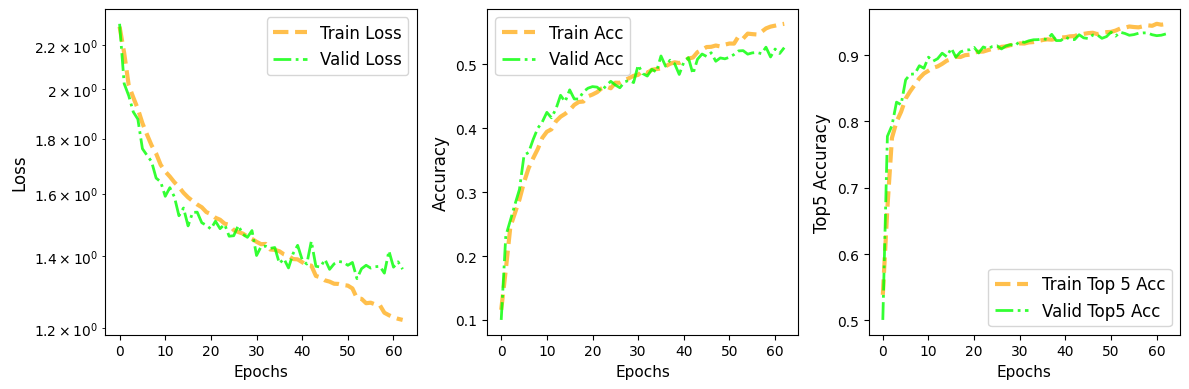

In [59]:
### Plot train and validation curves
loss = ViT_Train.history['loss']
v_loss = ViT_Train.history['val_loss']

acc = ViT_Train.history['accuracy']
v_acc = ViT_Train.history['val_accuracy']

top5_acc = ViT_Train.history['top5 acc']
val_top5_acc = ViT_Train.history['val_top5 acc']
epochs = range(len(loss))

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
# plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 3, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc')
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 3, 3)
plt.plot(epochs, top5_acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Top 5 Acc')
plt.plot(epochs, val_top5_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Top5 Acc')
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Top5 Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

313/313 [==============================] - 9s 20ms/step
Classification Report:

              precision    recall  f1-score   support

    airplane       0.50      0.66      0.57      1000
  automobile       0.48      0.76      0.59      1000
        bird       0.52      0.35      0.42      1000
         cat       0.41      0.40      0.40      1000
        deer       0.63      0.35      0.45      1000
         dog       0.43      0.42      0.43      1000
        frog       0.53      0.76      0.62      1000
       horse       0.55      0.47      0.51      1000
        ship       0.70      0.57      0.63      1000
       truck       0.63      0.49      0.55      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.52     10000
weighted avg       0.54      0.52      0.52     10000



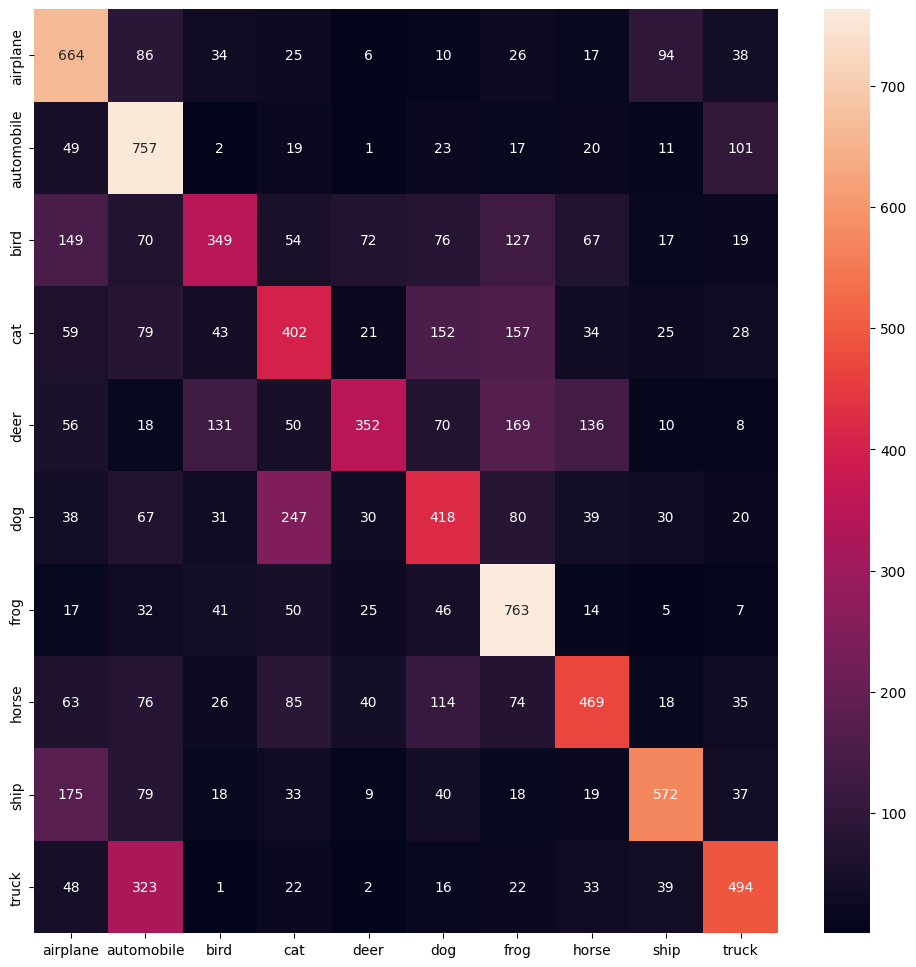

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def conf_matrix(predictions):
    ''' Plots conf. matrix and classification report '''
    cm=confusion_matrix(y_test, np.argmax(np.round(predictions), axis=1))
    print("Classification Report:\n")
    cr=classification_report(y_test,
                                np.argmax(np.round(predictions), axis=1),
                                target_names=[class_types[i] for i in range(len(class_types))])
    print(cr)
    plt.figure(figsize=(12,12))
    sns_hmp = sns.heatmap(cm, annot=True, xticklabels = [class_types[i] for i in range(len(class_types))],
                yticklabels = [class_types[i] for i in range(len(class_types))], fmt="d")
    fig = sns_hmp.get_figure()
    # fig.savefig('/content/gdrive/My Drive/Colab Notebooks/resnet/heatmap.png', dpi=250)

pred_class_resnet50 = ViT_model.predict(x_test)
conf_matrix(pred_class_resnet50)

Comparision of VGG16Model, ResNet50Model and Vision transformer  Accuracy on CIFAR 10 

   The accuracy of the Resnet50 model on the cifar10 dataset is nearly 94 percent which is high compared to the other two models which means that the performace of the Resnet50 is better and the Vgg16 accuracy is also good which is around 88 percent and the vision transformer performance is not that good on the dataset.
   
 The ResNet50 and Vgg16 can be convered faster compared to the VIT transformer as the architecture of VIT is very huge it requires more data to get it tuned and also it require high computation resources as compared to the other models 
   
Architecture:
VGG16: Convolutional layers followed by fully connected layers.
ResNet: Residual blocks for deep networks.
ViT: Self-attention mechanism instead of convolutions.

Efficiency:
ViT typically requires more parameters.
ResNet and VGG16 often converge faster during training.

Performance:
ViT competes well but needs careful tuning.
ResNet widely used and effective.
VGG16 still strong, albeit older.

Generalization:
ViT captures long-range dependencies well.
ResNet and VGG16 excel in local features.

Resource Usage:
ViT demands more resources.
ResNet and VGG16 are more resource-friendly.

Transfer Learning:
ViT may need more data and fine-tuning.